<a href="https://colab.research.google.com/github/Arefaat18/Signals-Classifier/blob/master/Signals_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

**Downloading and Extracting the Dataset**

In [ ]:
!wget 'http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2'

--2020-04-28 18:23:26--  http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
Resolving opendata.deepsig.io (opendata.deepsig.io)... 52.14.91.165
Connecting to opendata.deepsig.io (opendata.deepsig.io)|52.14.91.165|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1245608913 (1.2G) [application/x-bzip2]
Saving to: ‘RML2016.10b.tar.bz2’

RML2016.10b.tar.bz2 100%[===================>]   1.16G  5.91MB/s    in 3m 5s   

2020-04-28 18:26:31 (6.43 MB/s) - ‘RML2016.10b.tar.bz2’ saved [1245608913/1245608913]



In [ ]:
!tar xjvf RML2016.10b.tar.bz2

RML2016.10b.dat
LICENSE.TXT


In [ ]:
with open("RML2016.10b.dat",'rb') as f:
  Data=pickle.load(f,encoding="latin1")
snrs,mods=map(lambda j:sorted(list(set(map(lambda x:x[j],Data.keys())))),[1,0])
dataset=[]
labels=[]
for mod in mods:
  for snr in snrs:
    dataset.append(Data[(mod,snr)])
    for i in range(Data[mod,snr].shape[0]): labels.append((mod,snr))

dataset=np.vstack(dataset)
dataset=np.asarray(dataset)

**Calculating the Derivative**

In [ ]:
derivative=[]
for i in range(len(dataset)):
  x=[]
  x.append(np.gradient(dataset[i][0]))
  x.append(np.gradient(dataset[i][1]))
  derivative.append(x)
derivative = np.array(derivative)

**Calculating the Integral**

In [ ]:
integration=[]
for i in range(len(dataset)):
  x=[]
  x.append(integrate.cumtrapz(dataset[i][0],initial=0))
  x.append(integrate.cumtrapz(dataset[i][1],initial=0))
  integration.append(x)
integration = np.array(integration)
print(integration.shape)

(1200000, 2, 128)


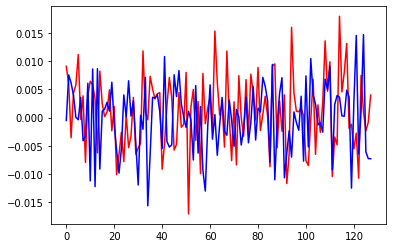

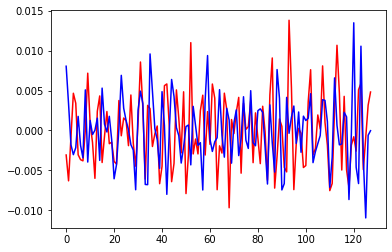

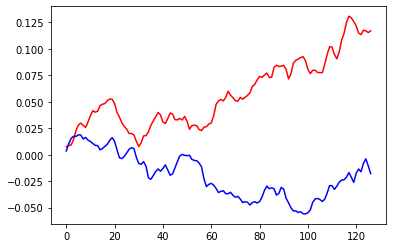

In [ ]:
plt.plot(dataset[0][0],'r')
plt.plot(dataset[0][1],'b')
plt.show()
plt.plot(derivative[0][0],'r')
plt.plot(derivative[0][1],'b')
plt.show()
plt.plot(integration[0][0],'r')
plt.plot(integration[0][1],'b')
plt.show()

In [ ]:
labels_train_validate , labels_test , data_train_validate , data_test = train_test_split(labels,dataset,test_size=0.3,random_state=42)
labels_train , labels_validate , data_train , data_validate = train_test_split(labels_train_validate,data_train_validate,test_size=0.05,random_state=42)

resized_data_train= data_train.reshape(798000,2*128)
resized_data_test=data_test.reshape(360000,2*128)

In [ ]:
lbls_train=[]
snrs_train=[]
for i in range(len(labels_train)):
  lbls_train.append(labels_train[i][0])
  snrs_train.append(labels_train[i][1])

lbls_test=[]
snrs_test=[]
for i in range(len(labels_test)):
  lbls_test.append(labels_test[i][0])
  snrs_test.append(labels_test[i][1])

lbls_val=[]
snrs_val=[]
for i in range(len(labels_validate)):
  lbls_val.append(labels_validate[i][0])
  snrs_val.append(labels_validate[i][1])

lbls_test = np.array(lbls_test)
snrs_test = np.array(snrs_test)

# **Raw Time**

**Random Forest Classifier**

In [ ]:
lb = preprocessing.LabelBinarizer()
lb.fit(lbls_train)

clf=RandomForestClassifier()
clf.fit(resized_data_train,lb.transform(lbls_train))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
accuracy = []
for snr in snrs:
  data_test_snr=resized_data_test[np.where(snrs_test==snr)]
  mod_test_snr=lbls_test[np.where(snrs_test==snr)]
  score = clf.score(data_test_snr , lb.transform(mod_test_snr))
  accuracy.append(score)
  print(score)

plt.plot(snrs,accuracy)
plt.xlabel('SNR in db')
plt.ylabel('Accuracy')
plt.title("Accuracy / SNR")
plt.show()
print("Average Accuracy = ",np.mean(accuracy))


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


**Logistic Regression**

In [ ]:
logisticRegr = LogisticRegression()
logisticRegr.fit(resized_data_train, lbls_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

-20
0.09735643674330778
-18
0.09980073065426769
-16
0.10670630987776676
-14
0.1056
-12
0.11524803018532905
-10
0.1461614715277013
-8
0.17574908989078689
-6
0.1858910063523905
-4
0.18289429809936644
-2
0.18387222438644332
0
0.17985252536452848
2
0.17626459143968873
4
0.18255476084041128
6
0.18051511758118702
8
0.18135348372041338
10
0.18645961345101106
12
0.17957668439716312
14
0.1834474314020148
16
0.17387186629526463
18
0.17762756939442628


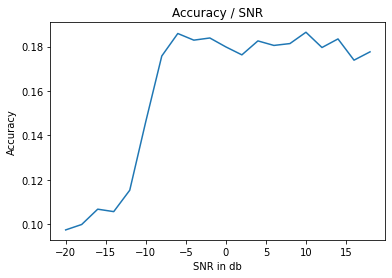

Average Accuracy =  0.1600401620801734


In [ ]:
accuracy = []
for snr in snrs:
  print (snr)
  data_test_snr=resized_data_test[np.where(snrs_test==snr)]
  mod_test_snr=lbls_test[np.where(snrs_test==snr)]
  score = logisticRegr.score(data_test_snr , mod_test_snr)
  accuracy.append(score)
  print(score)

plt.plot(snrs,accuracy)
plt.xlabel('SNR in db')
plt.ylabel('Accuracy')
plt.title("Accuracy / SNR")
plt.show()
print("Average Accuracy = ",np.mean(accuracy))

**Decision Tree**

In [ ]:
lb = preprocessing.LabelBinarizer()
lb.fit(lbls_train)
clf = DecisionTreeClassifier(random_state=0)
clf.fit(resized_data_train,lb.transform(lbls_train))


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

-20
0.10457625236032433
-18
0.10201483449573785
-16
0.10566016958484749
-14
0.10394482758620689
-12
0.10870047719454001
-10
0.11829496640599185
-8
0.12842341080929712
-6
0.1473866042572161
-4
0.18472824274758254
-2
0.22872725249040013
0
0.28408271885568553
2
0.34207893274041135
4
0.4203732677693339
6
0.477491601343785
8
0.518446494054895
10
0.5543514691095967
12
0.5514184397163121
14
0.5631435409361607
16
0.5655153203342619
18
0.5690065931630561


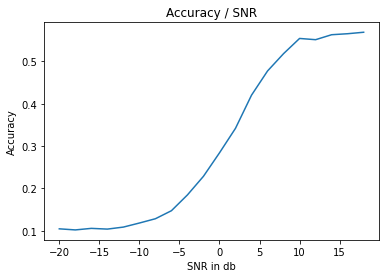

Average Accuracy =  0.3089182707977821


In [ ]:
accuracy = []
for snr in snrs:
  print(snr)
  data_test_snr=resized_data_test[np.where(snrs_test==snr)]
  mod_test_snr=lbls_test[np.where(snrs_test==snr)]
  score = clf.score(data_test_snr , lb.transform(mod_test_snr))
  print(score)
  accuracy.append(score)

plt.plot(snrs,accuracy)
plt.xlabel('SNR in db')
plt.ylabel('Accuracy')
plt.title("Accuracy / SNR")
plt.show()
print("Average Accuracy = ",np.mean(accuracy))

# **Derivatives**

In [ ]:
labels_train_validate , labels_test , data_train_validate , data_test = train_test_split(labels,derivative,test_size=0.3,random_state=42)
labels_train , labels_validate , data_train , data_validate = train_test_split(labels_train_validate,data_train_validate,test_size=0.05,random_state=42)

resized_data_train= data_train.reshape(798000,2*128)
resized_data_test=data_test.reshape(360000,2*128)

In [ ]:
lbls_train=[]
snrs_train=[]
for i in range(len(labels_train)):
  lbls_train.append(labels_train[i][0])
  snrs_train.append(labels_train[i][1])

lbls_test=[]
snrs_test=[]
for i in range(len(labels_test)):
  lbls_test.append(labels_test[i][0])
  snrs_test.append(labels_test[i][1])

lbls_test = np.array(lbls_test)
snrs_test = np.array(snrs_test)

**Random Forest Classifier**

In [ ]:
lb = preprocessing.LabelBinarizer()
lb.fit(lbls_train)

clf=RandomForestClassifier()
clf.fit(resized_data_train,lb.transform(lbls_train))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
accuracy = []
for snr in snrs:
  data_test_snr=resized_data_test[np.where(snrs_test==snr)]
  mod_test_snr=lbls_test[np.where(snrs_test==snr)]
  score = clf.score(data_test_snr , lb.transform(mod_test_snr))
  accuracy.append(score)
  print(score)

plt.plot(snrs,accuracy)
plt.xlabel('SNR in db')
plt.ylabel('Accuracy')
plt.title("Accuracy / SNR")
plt.show()
print("Average Accuracy = ",np.mean(accuracy))


**Decision Tree**

In [ ]:
lb = preprocessing.LabelBinarizer()
lb.fit(lbls_train)
clf = DecisionTreeClassifier(random_state=0)
clf.fit(resized_data_train,lb.transform(lbls_train))

In [ ]:
accuracy = []
for snr in snrs:
  print(snr)
  data_test_snr=resized_data_test[np.where(snrs_test==snr)]
  mod_test_snr=lbls_test[np.where(snrs_test==snr)]
  score = clf.score(data_test_snr , lb.transform(mod_test_snr))
  print(score)
  accuracy.append(score)

plt.plot(snrs,accuracy)
plt.xlabel('SNR in db')
plt.ylabel('Accuracy')
plt.title("Accuracy / SNR")
plt.show()
print("Average Accuracy = ",np.mean(accuracy))

**Logistic Regression**

In [ ]:
logisticRegr = LogisticRegression()
logisticRegr.fit(resized_data_train, lbls_train)

In [ ]:
accuracy = []
for snr in snrs:
  print (snr)
  data_test_snr=resized_data_test[np.where(snrs_test==snr)]
  mod_test_snr=lbls_test[np.where(snrs_test==snr)]
  score = logisticRegr.score(data_test_snr , mod_test_snr)
  accuracy.append(score)
  print(score)

plt.plot(snrs,accuracy)
plt.xlabel('SNR in db')
plt.ylabel('Accuracy')
plt.title("Accuracy / SNR")
plt.show()
print("Average Accuracy = ",np.mean(accuracy))

# **Integral**

In [ ]:
labels_train_validate , labels_test , data_train_validate , data_test = train_test_split(labels,integration,test_size=0.3,random_state=42)
labels_train , labels_validate , data_train , data_validate = train_test_split(labels_train_validate,data_train_validate,test_size=0.05,random_state=42)

resized_data_train= data_train.reshape(798000,2*128)
resized_data_test=data_test.reshape(360000,2*128)

In [ ]:
lbls_train=[]
snrs_train=[]
for i in range(len(labels_train)):
  lbls_train.append(labels_train[i][0])
  snrs_train.append(labels_train[i][1])

lbls_test=[]
snrs_test=[]
for i in range(len(labels_test)):
  lbls_test.append(labels_test[i][0])
  snrs_test.append(labels_test[i][1])

lbls_test = np.array(lbls_test)
snrs_test = np.array(snrs_test)

**Random Forest**

In [ ]:
lb = preprocessing.LabelBinarizer()
lb.fit(lbls_train)

clf=RandomForestClassifier()
clf.fit(resized_data_train,lb.transform(lbls_train))

In [ ]:
accuracy = []
for snr in snrs:
  data_test_snr=resized_data_test[np.where(snrs_test==snr)]
  mod_test_snr=lbls_test[np.where(snrs_test==snr)]
  score = clf.score(data_test_snr , lb.transform(mod_test_snr))
  accuracy.append(score)
  print(score)

plt.plot(snrs,accuracy)
plt.xlabel('SNR in db')
plt.ylabel('Accuracy')
plt.title("Accuracy / SNR")
plt.show()
print("Average Accuracy = ",np.mean(accuracy))


**Logistic Regression**

In [ ]:
logisticRegr = LogisticRegression()
logisticRegr.fit(resized_data_train, lbls_train)

In [ ]:
accuracy = []
for snr in snrs:
  print (snr)
  data_test_snr=resized_data_test[np.where(snrs_test==snr)]
  mod_test_snr=lbls_test[np.where(snrs_test==snr)]
  score = logisticRegr.score(data_test_snr , mod_test_snr)
  accuracy.append(score)
  print(score)

plt.plot(snrs,accuracy)
plt.xlabel('SNR in db')
plt.ylabel('Accuracy')
plt.title("Accuracy / SNR")
plt.show()
print("Average Accuracy = ",np.mean(accuracy))

**Decision Tree**

In [ ]:
lb = preprocessing.LabelBinarizer()
lb.fit(lbls_train)
clf = DecisionTreeClassifier(random_state=0)
clf.fit(resized_data_train,lb.transform(lbls_train))

In [ ]:
accuracy = []
for snr in snrs:
  print(snr)
  data_test_snr=resized_data_test[np.where(snrs_test==snr)]
  mod_test_snr=lbls_test[np.where(snrs_test==snr)]
  score = clf.score(data_test_snr , lb.transform(mod_test_snr))
  print(score)
  accuracy.append(score)

plt.plot(snrs,accuracy)
plt.xlabel('SNR in db')
plt.ylabel('Accuracy')
plt.title("Accuracy / SNR")
plt.show()
print("Average Accuracy = ",np.mean(accuracy))

# **Combination**

In [ ]:
combination = np.concatenate((dataset, derivative,integration), axis=1)
labels_train_validate , labels_test , data_train_validate , data_test = train_test_split(labels,combination,test_size=0.3,random_state=42)
labels_train , labels_validate , data_train , data_validate = train_test_split(labels_train_validate,data_train_validate,test_size=0.05,random_state=42)

resized_data_train= data_train.reshape(798000,6*128)
resized_data_test=data_test.reshape(360000,6*128)

In [ ]:
lbls_train=[]
snrs_train=[]
for i in range(len(labels_train)):
  lbls_train.append(labels_train[i][0])
  snrs_train.append(labels_train[i][1])

lbls_test=[]
snrs_test=[]
for i in range(len(labels_test)):
  lbls_test.append(labels_test[i][0])
  snrs_test.append(labels_test[i][1])

lbls_test = np.array(lbls_test)
snrs_test = np.array(snrs_test)

** Logistic Regression**

In [ ]:
logisticRegr = LogisticRegression()
logisticRegr.fit(resized_data_train, lbls_train)

In [ ]:
accuracy = []
for snr in snrs:
  print (snr)
  data_test_snr=resized_data_test[np.where(snrs_test==snr)]
  mod_test_snr=lbls_test[np.where(snrs_test==snr)]
  score = logisticRegr.score(data_test_snr , mod_test_snr)
  accuracy.append(score)
  print(score)

plt.plot(snrs,accuracy)
plt.xlabel('SNR in db')
plt.ylabel('Accuracy')
plt.title("Accuracy / SNR")
plt.show()
print("Average Accuracy = ",np.mean(accuracy))

**Decision Tree**

In [ ]:
lb = preprocessing.LabelBinarizer()
lb.fit(lbls_train)
clf = DecisionTreeClassifier(random_state=0)
clf.fit(resized_data_train,lb.transform(lbls_train))

In [ ]:
accuracy = []
for snr in snrs:
  print(snr)
  data_test_snr=resized_data_test[np.where(snrs_test==snr)]
  mod_test_snr=lbls_test[np.where(snrs_test==snr)]
  score = clf.score(data_test_snr , lb.transform(mod_test_snr))
  print(score)
  accuracy.append(score)

plt.plot(snrs,accuracy)
plt.xlabel('SNR in db')
plt.ylabel('Accuracy')
plt.title("Accuracy / SNR")
plt.show()
print("Average Accuracy = ",np.mean(accuracy))

**Random Forest**

In [ ]:
lb = preprocessing.LabelBinarizer()
lb.fit(lbls_train)

clf=RandomForestClassifier()
clf.fit(resized_data_train,lb.transform(lbls_train))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

0.0
0.0
0.0
0.0
5.5487737210076573e-05
0.00038550501156515033
0.002296275553066368
0.007856904045469742
0.03706791152606424
0.08191886025933552
0.1643843211177025
0.23229571984435798
0.3015757711220384
0.3606942889137738
0.3974330481164574
0.4248128700703832
0.42730496453900707
0.4273946680024489
0.42428969359331475
0.42966369327940607


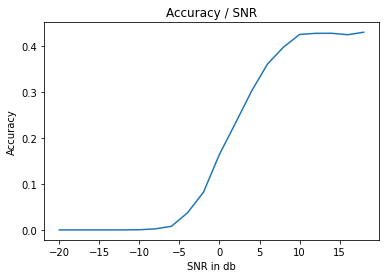

Average Accuracy =  0.18597149913658007


In [ ]:
accuracy = []
for snr in snrs:
  data_test_snr=resized_data_test[np.where(snrs_test==snr)]
  mod_test_snr=lbls_test[np.where(snrs_test==snr)]
  score = clf.score(data_test_snr , lb.transform(mod_test_snr))
  accuracy.append(score)
  print(score)

plt.plot(snrs,accuracy)
plt.xlabel('SNR in db')
plt.ylabel('Accuracy')
plt.title("Accuracy / SNR")
plt.show()
print("Average Accuracy = ",np.mean(accuracy))


# **CNN**

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten,Reshape
from keras.layers.convolutional import Convolution2D, MaxPooling2D,ZeroPadding2D
from keras.layers import Conv2D
import tensorflow as tf


Using TensorFlow backend.


**Raw Time**

In [ ]:
model = Sequential()
model.add(Reshape((1,2,128),input_shape=(2,128)))
model.add(Conv2D(64,(1,3), activation = "relu",padding="same"))
model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(16, (2, 3), activation='relu',padding="same"))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 1, 2, 128)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 2, 64)          24640     
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 3, 4, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 4, 16)          6160      
_________________________________________________________________
flatten_1 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               24704     
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [ ]:
le = preprocessing.LabelBinarizer()
le.fit(mods)
print(le.transform(lbls_train))

[[0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
#model.compile(optimizer='adam',loss='mean_absolute_percentage_error',metrics=['accuracy'])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

data_validate=np.array(data_validate)
snrs_val=np.array(snrs_val)
lbls_val=np.array(lbls_val)
history=[]
data_train=np.array(data_train)
snrs_train=np.array(snrs_train)
lbls_train=np.array(lbls_train)
for snr in snrs:
  print (snr)
  data_train_snr=data_train[np.where(snrs_train==snr)]
  mod_test_snr=lbls_train[np.where(snrs_train==snr)]
  data_val_snr=data_validate[np.where(snrs_val==snr)]
  mod_val_snr=lbls_val[np.where(snrs_val==snr)]
  print(data_train_snr.shape,le.transform(mod_test_snr).shape,data_val_snr.shape,le.transform(mod_val_snr).shape)
  history.append(model.fit(data_train_snr,le.transform(mod_test_snr),epochs=20,batch_size=64,validation_data=(data_val_snr,le.transform(mod_val_snr))))

-20
(39907, 2, 128) (39907, 10) (2087, 2, 128) (2087, 10)
Train on 39907 samples, validate on 2087 samples
Epoch 1/20
39907/39907 [==============================] - 3s 84us/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3032 - val_accuracy: 0.0954
Epoch 2/20
39907/39907 [==============================] - 4s 104us/step - loss: 2.3027 - accuracy: 0.0990 - val_loss: 2.3031 - val_accuracy: 0.1035
Epoch 3/20
39907/39907 [==============================] - 4s 97us/step - loss: 2.3027 - accuracy: 0.1003 - val_loss: 2.3033 - val_accuracy: 0.1035
Epoch 4/20
39907/39907 [==============================] - 3s 78us/step - loss: 2.3027 - accuracy: 0.0998 - val_loss: 2.3029 - val_accuracy: 0.1035
Epoch 5/20
39907/39907 [==============================] - 3s 75us/step - loss: 2.3027 - accuracy: 0.1000 - val_loss: 2.3031 - val_accuracy: 0.0896
Epoch 6/20
39907/39907 [==============================] - 3s 74us/step - loss: 2.3027 - accuracy: 0.1009 - val_loss: 2.3030 - val_accuracy: 0.0954
Epoch 7/20

In [ ]:
np.argmax(model.predict(data_test))

381365

0.6264367699623108


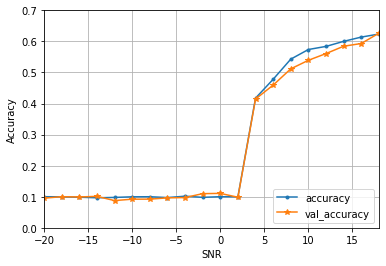

In [ ]:
print(history[19].history['val_accuracy'][-1])
val_acc=[]
accu=[]
for i in range(len(snrs)):
  val_acc.append(history[i].history['val_accuracy'][-1])
  accu.append(history[i].history['accuracy'][-1])


plt.plot(snrs,accu, label='accuracy',marker=".")
plt.plot(snrs,val_acc, label = 'val_accuracy',marker="*")
plt.xlabel('SNR')
plt.ylabel('Accuracy')
plt.ylim([0,0.7])
plt.xlim([-20,18])
plt.grid(b=True)
plt.legend(loc='lower right')
plt.show()

**Derivative**

In [ ]:
labels_train_validate , labels_test , data_train_validate , data_test = train_test_split(labels,derivative,test_size=0.3,random_state=42)
labels_train , labels_validate , data_train , data_validate = train_test_split(labels_train_validate,data_train_validate,test_size=0.05,random_state=42)

resized_data_train= data_train.reshape(798000,2*128)
resized_data_test=data_test.reshape(360000,2*128)

In [ ]:
lbls_train=[]
snrs_train=[]
for i in range(len(labels_train)):
  lbls_train.append(labels_train[i][0])
  snrs_train.append(labels_train[i][1])

lbls_test=[]
snrs_test=[]
for i in range(len(labels_test)):
  lbls_test.append(labels_test[i][0])
  snrs_test.append(labels_test[i][1])

lbls_val=[]
snrs_val=[]
for i in range(len(labels_validate)):
  lbls_val.append(labels_validate[i][0])
  snrs_val.append(labels_validate[i][1])

lbls_test = np.array(lbls_test)
snrs_test = np.array(snrs_test)

In [ ]:
#model.compile(optimizer='adam',loss='mean_absolute_percentage_error',metrics=['accuracy'])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

data_validate=np.array(data_validate)
snrs_val=np.array(snrs_val)
lbls_val=np.array(lbls_val)
history=[]
data_train=np.array(data_train)
snrs_train=np.array(snrs_train)
lbls_train=np.array(lbls_train)
for snr in snrs:
  print (snr)
  data_train_snr=data_train[np.where(snrs_train==snr)]
  mod_test_snr=lbls_train[np.where(snrs_train==snr)]
  data_val_snr=data_validate[np.where(snrs_val==snr)]
  mod_val_snr=lbls_val[np.where(snrs_val==snr)]
  print(data_train_snr.shape,le.transform(mod_test_snr).shape,data_val_snr.shape,le.transform(mod_val_snr).shape)
  history.append(model.fit(data_train_snr,le.transform(mod_test_snr),epochs=20,batch_size=64,validation_data=(data_val_snr,le.transform(mod_val_snr))))

-20
(39907, 2, 128) (39907, 10) (2087, 2, 128) (2087, 10)
Train on 39907 samples, validate on 2087 samples
Epoch 1/20
39907/39907 [==============================] - 3s 64us/step - loss: 2.5638 - accuracy: 0.0965 - val_loss: 2.3275 - val_accuracy: 0.0982
Epoch 2/20
39907/39907 [==============================] - 2s 60us/step - loss: 2.3180 - accuracy: 0.1034 - val_loss: 2.3167 - val_accuracy: 0.1126
Epoch 3/20
39907/39907 [==============================] - 2s 60us/step - loss: 2.3113 - accuracy: 0.1052 - val_loss: 2.3269 - val_accuracy: 0.0958
Epoch 4/20
39907/39907 [==============================] - 2s 61us/step - loss: 2.3073 - accuracy: 0.1084 - val_loss: 2.3141 - val_accuracy: 0.0973
Epoch 5/20
39907/39907 [==============================] - 2s 61us/step - loss: 2.3023 - accuracy: 0.1118 - val_loss: 2.3355 - val_accuracy: 0.1011
Epoch 6/20
39907/39907 [==============================] - 2s 60us/step - loss: 2.2996 - accuracy: 0.1120 - val_loss: 2.3292 - val_accuracy: 0.0934
Epoch 7/20
